In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
import os
import copy

from dgl.geometry import farthest_point_sampler
import open3d as o3d

from utils import fps, depth2fgpcd, pcd2pix, fps_np, downsample_pcd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [45]:
pcd_all_list = []
extrinsic_matrixs = []
global_scale = 24

for i in range(5):
    # load data
    env = 'test_carrots'
    cam_view = 'cam_view_{}'.format(i)
    dir_path = os.path.join(env, cam_view)
    
    obs = np.load(os.path.join(dir_path, 'obs.npy'))
    camera_intrinsic_params = np.load(os.path.join(dir_path, 'camera_intrinsic_params.npy'))
    camera_extrinsic_matrix = np.load(os.path.join(dir_path, 'camera_extrinsic_matrix.npy'))
    extrinsic_matrixs.append(camera_extrinsic_matrix)
    
    # depth to pcd
    depth = obs[..., -1] / global_scale
    fgpcd = depth2fgpcd(depth, depth<0.599/0.8, camera_intrinsic_params)
    
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(fgpcd)
    
    pcd_all_list.append(pcd)
    

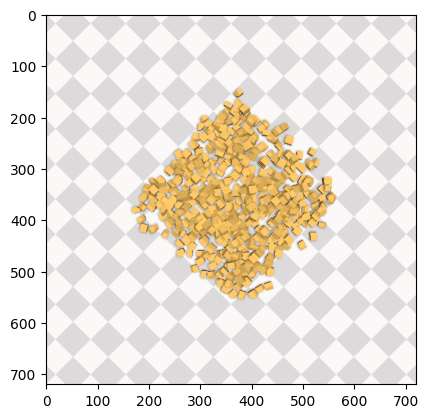

In [49]:
color = obs[:, :, :3] / 255.
plt.imshow(color)

In [34]:
pcd_all = o3d.geometry.PointCloud()
pcd_all = [pcd_all_list[0]]
for point_id in range(1, len(pcd_all_list)):
    trans = extrinsic_matrixs[point_id] @ np.linalg.inv(extrinsic_matrixs[0])
    pcd_all_list[point_id].transform(trans)
    pcd_all.append(pcd_all_list[point_id])

In [38]:
o3d.visualization.draw_geometries(pcd_all)

In [36]:
o3d.visualization.draw_geometries([pcd_all_list[0]])

In [28]:
source_1 = pcd_all_list[1]
source_2 = pcd_all_list[2]
target = pcd_all_list[0]

In [29]:
source_1.transform(extrinsic_matrixs[1] @ np.linalg.inv(extrinsic_matrixs[0]))
source_2.transform(extrinsic_matrixs[2] @ np.linalg.inv(extrinsic_matrixs[0]))

PointCloud with 71097 points.

In [32]:
o3d.visualization.draw_geometries([source_1, source_2, target])